In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [5]:
import warnings

warnings.filterwarnings('ignore')

# overview of datasets

**This project analyzes the Rain in Australia dataset to predict whether it will rain the next day based on historical weather observations.

The project follows a complete Machine Learning pipeline, starting from data understanding and preprocessing, through model building, evaluation, and comparison.****

# import libraries

In [6]:
# All the libraries used in this project
import numpy as np
import pandas as pd
import seaborn as sns           
import matplotlib                
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


# load dataset

In [7]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# exploratory data analysis

In [9]:
df.shape

(145460, 23)

**AS WE CAN SEE THERE IS 145460 ROWS AND 23 COLUMNS**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**as we can see the types of variables is float (numerical) & object (categorical) & there is missing values**

<Axes: >

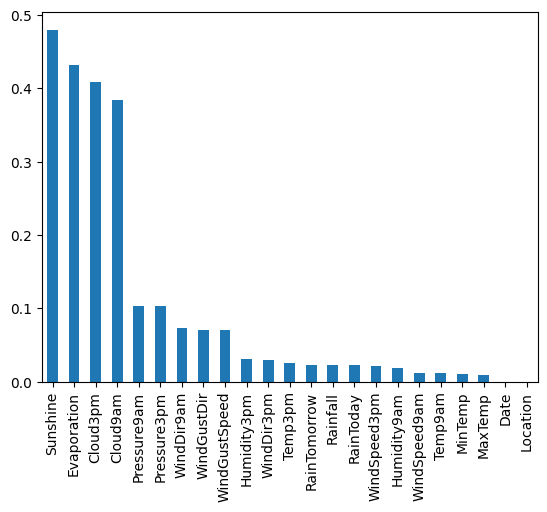

In [12]:
df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [13]:
(df.isna().mean() * 100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Date              0.000000
Location          0.000000
dtype: float64

**Sunshine, Evaporation has most missing values so we will impute it not delete it**

In [14]:
df['RainTomorrow'].value_counts(normalize=True) * 100

RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64

In [15]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

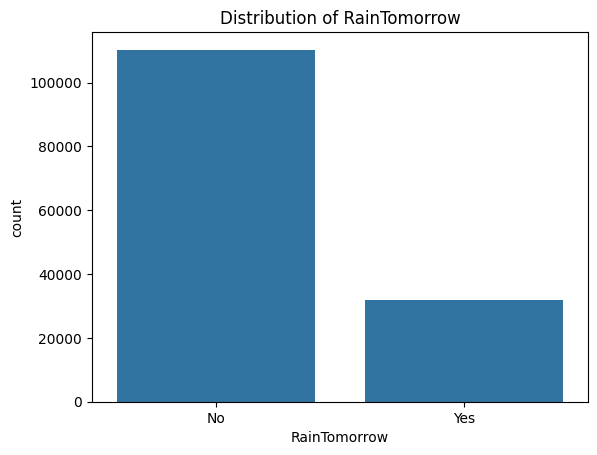

In [16]:
sns.countplot(x='RainTomorrow', data=df)
plt.title("Distribution of RainTomorrow")
plt.show()


In [17]:
# For example, let's show the distribution of RainTomorrow depending on the localization
fig=px.histogram(df, 
                 x="RainTomorrow",
                 color="Location",
                 hover_data=df.columns,
                 title="Distribution of RainTomorrow Distribution by Location",
                 barmode="group",
                )
fig.show()

# relation between feature and rain

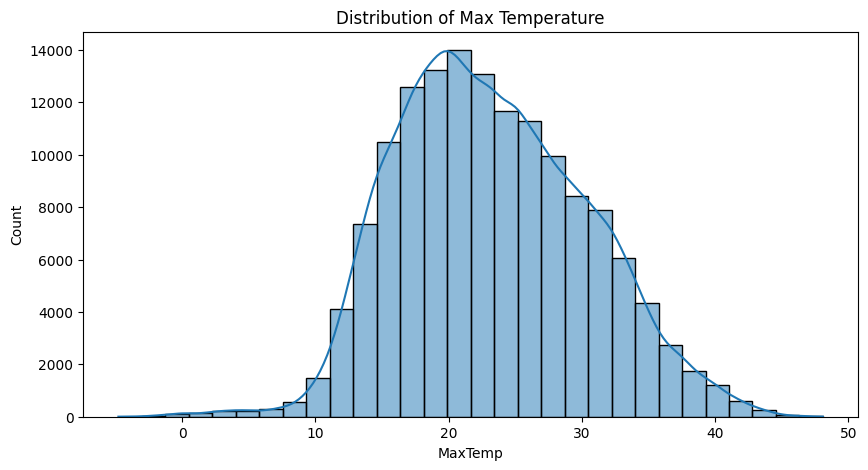

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['MaxTemp'], bins=30, kde=True)
plt.title("Distribution of Max Temperature")
plt.show()


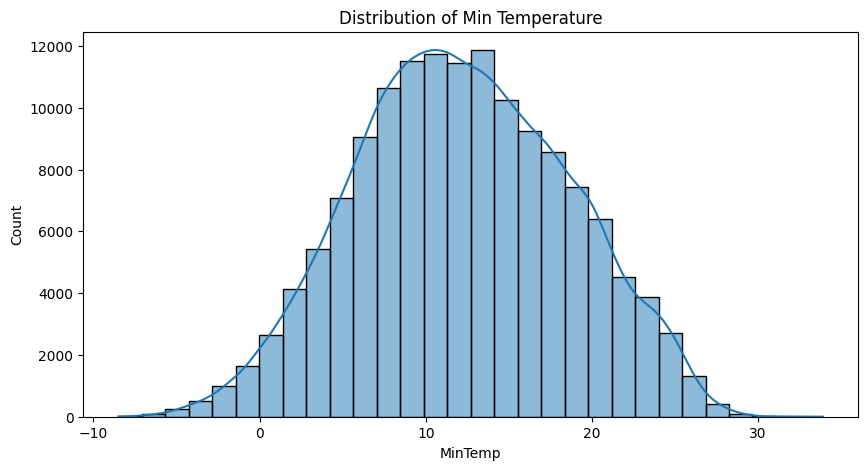

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df['MinTemp'], bins=30, kde=True)
plt.title("Distribution of Min Temperature")
plt.show()

**here is not outliers & distribution normal**

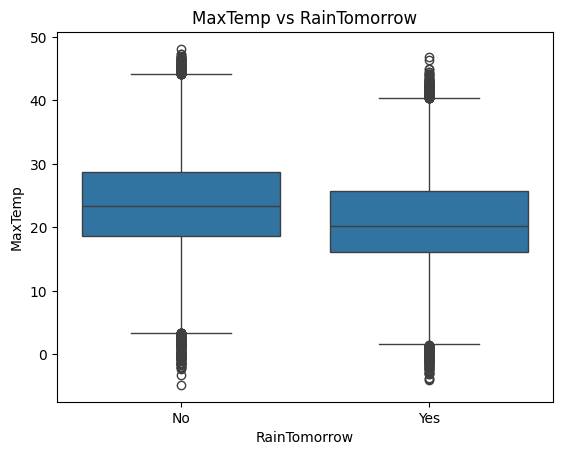

In [20]:
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df)
plt.title("MaxTemp vs RainTomorrow")
plt.show()


**relation between temp and rain **

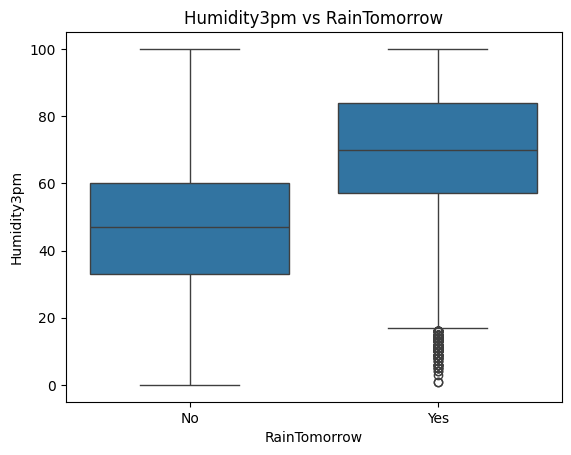

In [21]:
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title("Humidity3pm vs RainTomorrow")
plt.show()


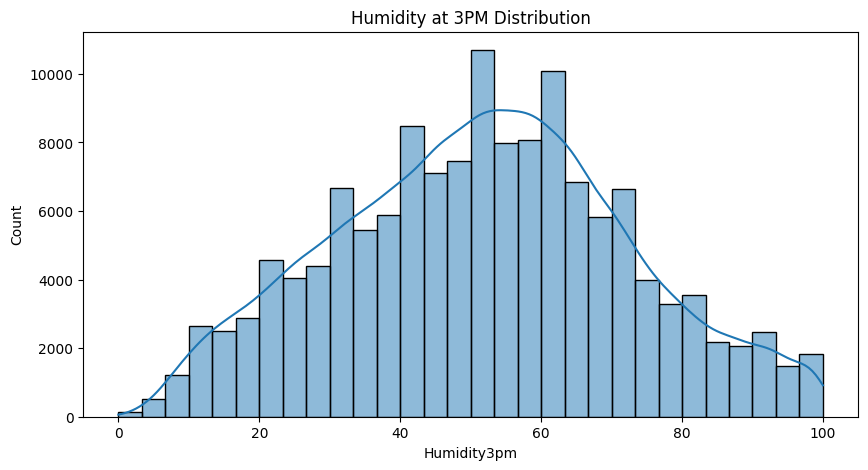

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['Humidity3pm'], bins=30, kde=True)
plt.title("Humidity at 3PM Distribution")
plt.show()


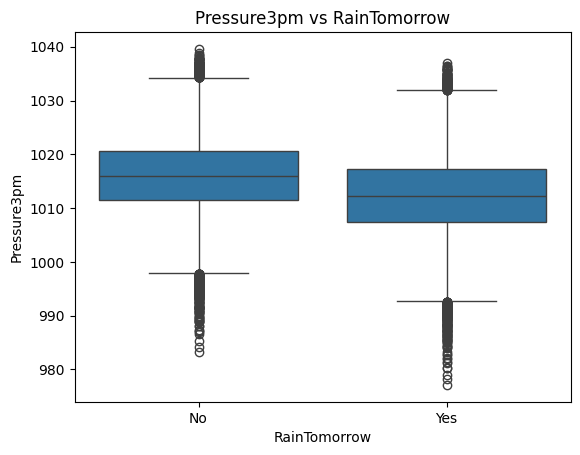

In [23]:
sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=df)
plt.title("Pressure3pm vs RainTomorrow")
plt.show()


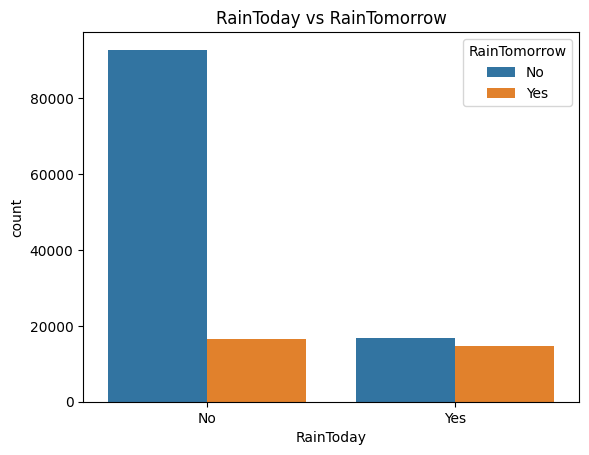

In [24]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)
plt.title("RainToday vs RainTomorrow")
plt.show()

**if rain today tommorrow will rain more **

findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.


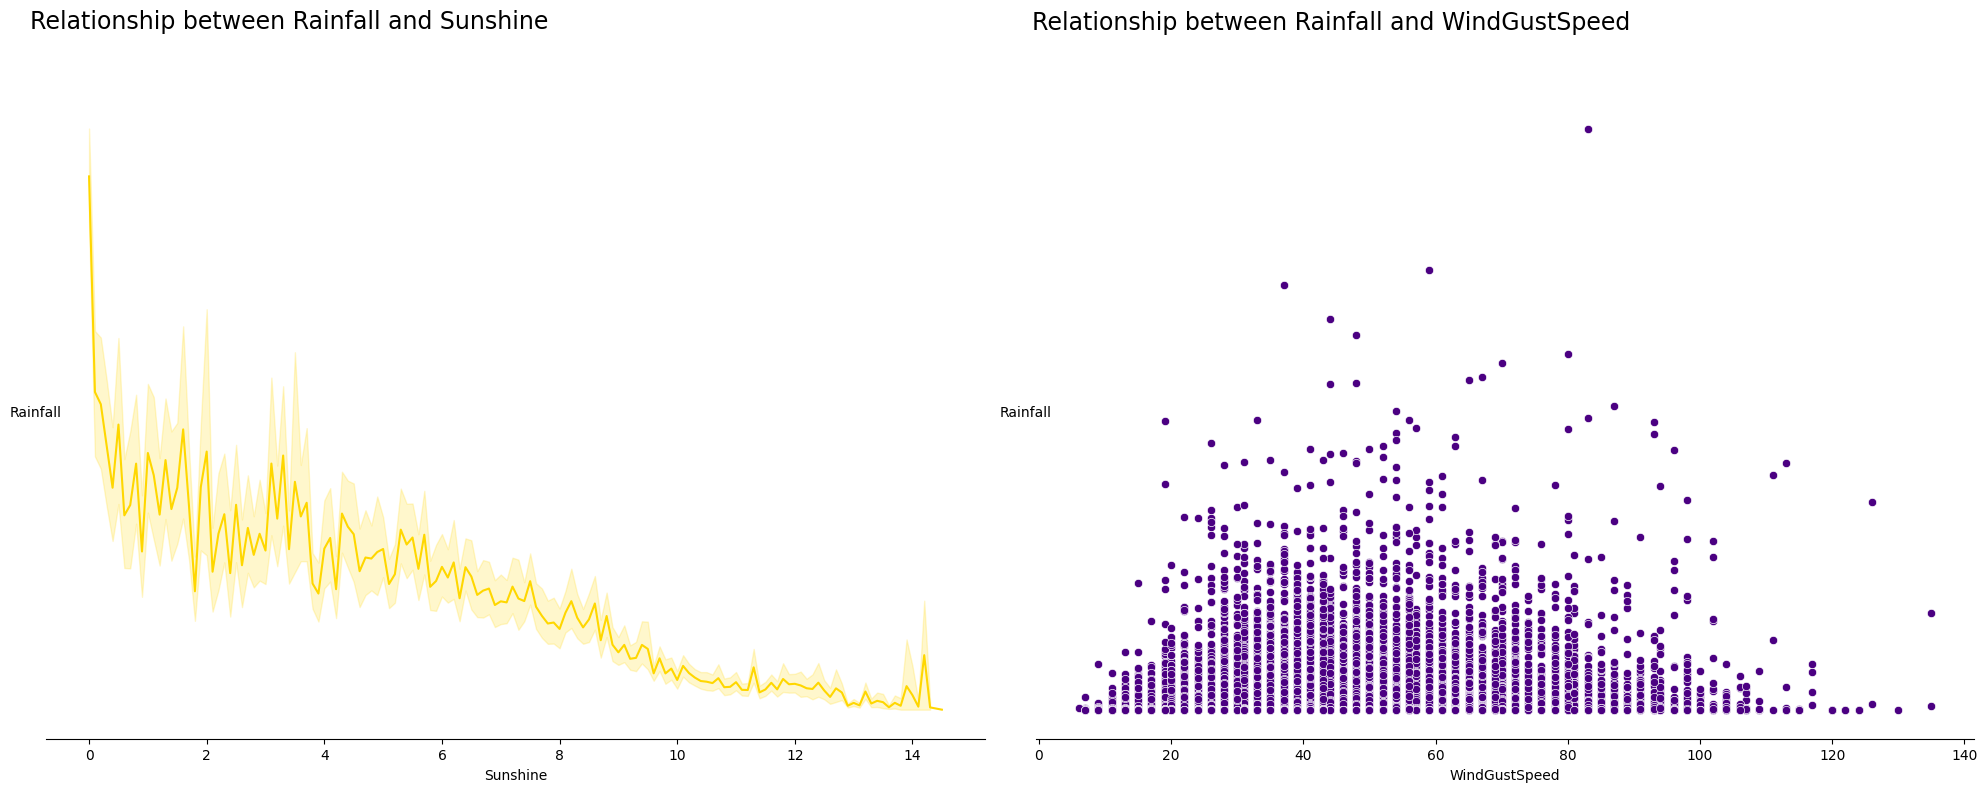

In [25]:
# Let's look at the relationship between two continuous variables

fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Rainfall and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and WindGustSpeed",fontsize=17,fontweight='normal', fontfamily='Verdana')

sns.lineplot(data=df,x='Sunshine',y='Rainfall',ax=ax[0],color='#FFD700')
sns.scatterplot(data=df,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='#4B0082')
for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()


<Axes: xlabel='Cloud3pm', ylabel='Rainfall'>

findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.


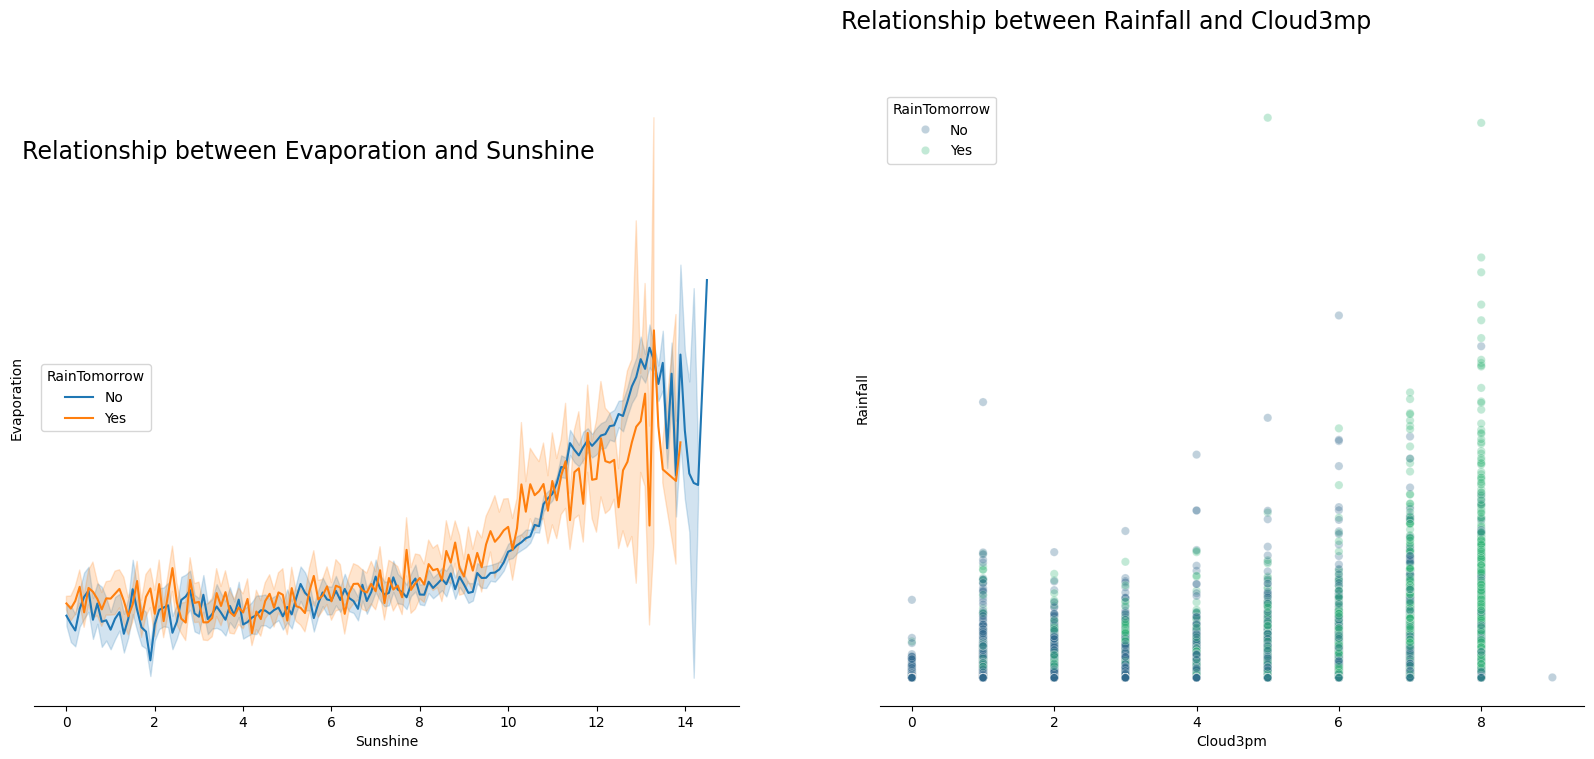

In [26]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Evaporation and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and Cloud3mp",fontsize=17,fontweight='normal', fontfamily='Verdana')


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

sns.lineplot(data=df,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sns.scatterplot(data=df,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='viridis',markers='o',alpha=0.3)

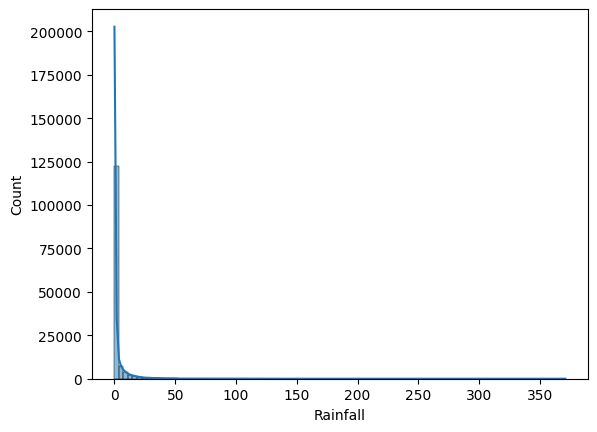

In [27]:
# Let's see how the Rainfall feature is distributed across 100 bins
sns.histplot(data = df, x = 'Rainfall', bins = 100, kde = True);

In [28]:
df.nunique().sort_values(ascending=False)

Date             3436
Rainfall          681
Pressure3pm       549
Pressure9am       546
MaxTemp           505
Temp3pm           502
Temp9am           441
MinTemp           389
Evaporation       358
Sunshine          145
Humidity9am       101
Humidity3pm       101
WindGustSpeed      67
Location           49
WindSpeed3pm       44
WindSpeed9am       43
WindDir9am         16
WindDir3pm         16
WindGustDir        16
Cloud3pm           10
Cloud9am           10
RainToday           2
RainTomorrow        2
dtype: int64

# handle missing values for categorical variables

In [29]:
cat_cols = df.select_dtypes(include=["object"]).columns
print(f"the number of categorical variable is {len(cat_cols)}")
print (f"the categorical variable is \n {cat_cols}" )


the number of categorical variable is 7
the categorical variable is 
 Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [30]:
# Missing values in categorical variables

for i in cat_cols:
    print(i, df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [31]:
# Filling missing values with mode of the column in value

for i in cat_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [32]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [33]:
# Let's convert  "Rain Today" and "RainTomorrow" into binary (1/0) for your convenience
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


# handle  missing values for numerical variables

In [34]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(f"the number of numerical variable is {len(num_cols)}")
print (f"the numerical variable is \n {num_cols}" )


the number of numerical variable is 18
the numerical variable is 
 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [35]:
for i in num_cols:
    print(i, df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 0
RainTomorrow 0


In [36]:
# Filling missing values with median of the column in value

for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)

In [37]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [39]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# preprocessing data & feature engineering

In [40]:
# Let's discuss categorical variables
cat_cols=df.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [41]:
# let's pass to the columns parameter the column that we want to delete
# let's delete the Date column, as we will not use it further in this project
df.drop(columns = ['Date'], inplace = True)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [42]:
# Let's discuss categorical variables again: the amount of categorical data has decreased
cat_cols=df.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [43]:
# Encode categorical variables
cat_cols = df.select_dtypes(include="object").columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape after encoding:", df.shape)
df.head()


Shape after encoding: (145460, 111)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [46]:
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (145460, 110)
y shape: (145460,)


# split data for amodel

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (116368, 110)
X_test shape: (29092, 110)
y_train shape: (116368,)
y_test shape: (29092,)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Train shape:", X_train_scaled.shape)
print("Scaled Test shape:", X_test_scaled.shape)


Scaled Train shape: (116368, 110)
Scaled Test shape: (29092, 110)


# try logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [50]:
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]


In [53]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

print("Logistic Regression Results")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1 Score :", f1_score(y_test, y_pred_lr))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Results
Accuracy : 0.851024336587378
Precision: 0.7325131009341536
Recall   : 0.504313725490196
F1 Score : 0.5973615756224452
ROC AUC  : 0.868128869543151


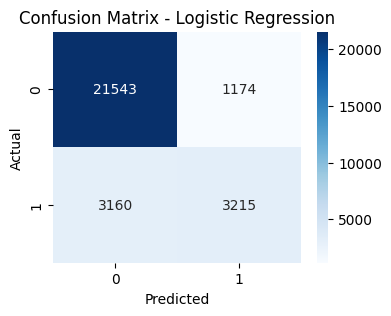

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


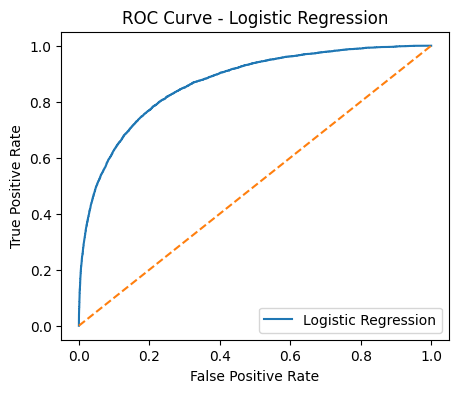

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


# try knn

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=7)

In [57]:
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]


In [58]:
print("KNN Results")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1 Score :", f1_score(y_test, y_pred_knn))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_knn))


KNN Results
Accuracy : 0.8142100921215455
Precision: 0.6592252133946159
Recall   : 0.31498039215686274
F1 Score : 0.4262817110710116
ROC AUC  : 0.7778607849179201


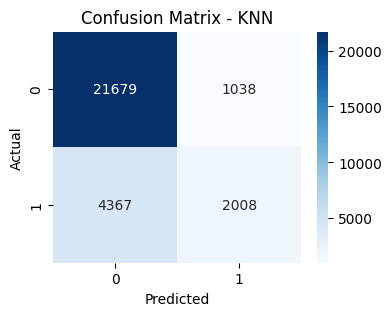

In [59]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


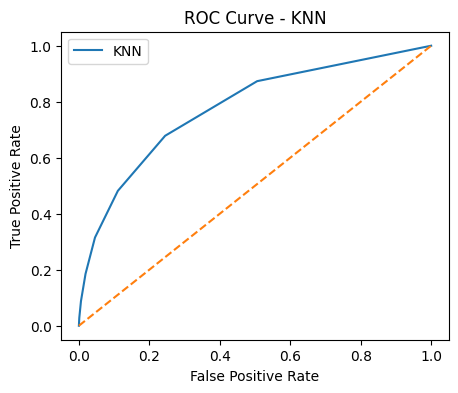

In [60]:
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label="KNN")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()


# try decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)

In [62]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]


In [63]:
print("Decision Tree Results")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_dt))


Decision Tree Results
Accuracy : 0.8426027773958477
Precision: 0.7034435885817852
Recall   : 0.48705882352941177
F1 Score : 0.5755862452497914
ROC AUC  : 0.8438198222459299


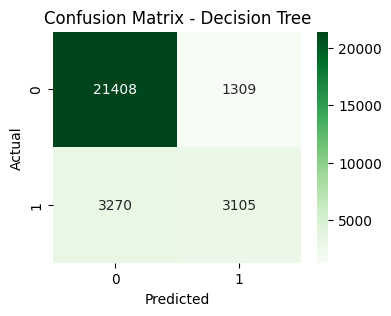

In [64]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


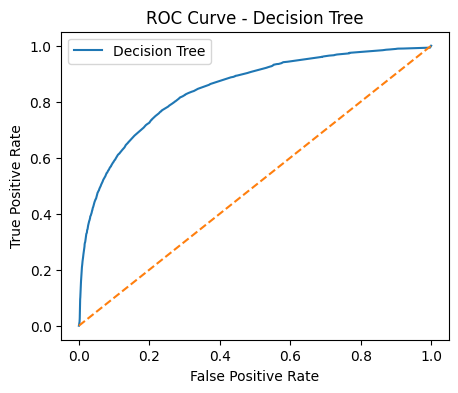

In [65]:
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label="Decision Tree")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


# try randomforest 

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=10, n_estimators=300, random_state=42)

In [67]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [68]:
print("Random Forest Results")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))

Random Forest Results
Accuracy : 0.8062697648838169
Precision: 0.5416525758088152
Recall   : 0.7537254901960785
F1 Score : 0.630329266692903
ROC AUC  : 0.8706441457421108


# final results

**The Random Forest model outperformed other models across most evaluation metrics.
	•	Achieved high predictive performance with strong generalization.
	•	Feature importance analysis revealed key predictors of rainfall, such as humidity and wind-related variables.

⸻

📊 Key Insights
	•	Rainfall prediction is highly influenced by atmospheric conditions rather than a single feature.
	•	Ensemble models provide more stable and accurate results for complex real-world datasets.
	•	Evaluating models using multiple metrics is crucial, especially for imbalanced classification problems.**